In [11]:
import basedosdados as bd
import pandas as pd
from plotnine import *

In [89]:
query = """
SELECT  DISTINCT id_municipio, nome FROM `basedosdados.br_denatran_frota.municipio_tipo` 
INNER JOIN `basedosdados.br_bd_diretorios_brasil.municipio` USING (id_municipio, sigla_uf)
GROUP BY sigla_uf, id_municipio, ano, mes, nome

HAVING COUNT(*) > 1
ORDER BY id_municipio"""
frota = bd.read_sql(query, billing_project_id="python-371123")
frota

Downloading: 100%|██████████| 11/11 [00:00<00:00, 32.26rows/s]


,id_municipio,nome
0,1100809,Candeias do Jamari
1,1600105,Amapá
2,1705102,Chapada da Natividade
3,2402105,Campo Redondo
4,2403509,Espírito Santo
5,2501575,Barra de Santana
6,2507408,Jericó
7,2513208,Santa Cruz
8,2513943,São Domingos do Cariri
9,4202438,Bocaina do Sul


In [24]:
query = """
SELECT id_estacao, data_fundacao, latitude, longitude, id_municipio as municipio
FROM `basedosdados.br_inmet_bdmep.estacao` 
"""

df = bd.read_sql(query, billing_project_id="python-371123")

Downloading: 100%|██████████| 612/612 [00:00<00:00, 1773.92rows/s]


In [16]:
query = """
SELECT precipitacao_total, data, id_estacao
FROM `basedosdados.br_inmet_bdmep.microdados`
WHERE EXTRACT(MONTH FROM data) = 10
  AND EXTRACT(YEAR FROM data) IN (2002, 2006, 2010, 2014, 2018, 2022)
  AND EXTRACT(HOUR FROM hora) >= 7
  AND EXTRACT(HOUR FROM hora) <= 17
  AND precipitacao_total IS NOT NULL
LIMIT 100000000
"""

df = bd.read_sql(query, billing_project_id="python-371123")

Downloading: 100%|██████████| 640808/640808 [00:25<00:00, 24813.06rows/s]


In [88]:
pd.read_csv("script/municipios.csv", index_col=0)

,id_municipio,latitude,longitude,uf,regiao
0,5200050,-16.7573,-49.4412,GO,Centro-Oeste
1,5200100,-16.1970,-48.7057,GO,Centro-Oeste
2,5200134,-17.3960,-50.3749,GO,Centro-Oeste
3,5200159,-16.4127,-50.1657,GO,Centro-Oeste
4,5200175,-14.9778,-47.7823,GO,Centro-Oeste
...,...,...,...,...,...
5565,3306107,-22.2445,-43.7129,RJ,Sudeste
5566,3306156,-20.9276,-41.8701,RJ,Sudeste
5567,3306206,-22.4059,-43.6686,RJ,Sudeste
5568,3306305,-22.5202,-44.0996,RJ,Sudeste


In [73]:
(
 pd.read_csv("temp2.csv", index_col= 0)
)

,id_estacao,data_fundacao,latitude,longitude,municipio
0,A001,2000-05-07,-15.789444,-47.925833,5300108.0
1,A042,2017-07-19,-15.599722,-48.131111,5300108.0
2,A045,2008-10-03,-15.596491,-47.625801,5300108.0
3,A046,2014-10-01,-15.935278,-48.137500,5300108.0
4,A047,2017-02-07,-16.012222,-47.557417,5300108.0
...,...,...,...,...,...
607,S113,2016-12-01,0.947778,-59.746389,1400233.0
608,S114,2016-12-01,4.477500,-61.149167,1400456.0
609,S122,2016-12-01,3.358889,-59.823889,1400159.0
610,A847,2007-03-23,-25.494444,-48.325833,4118204.0


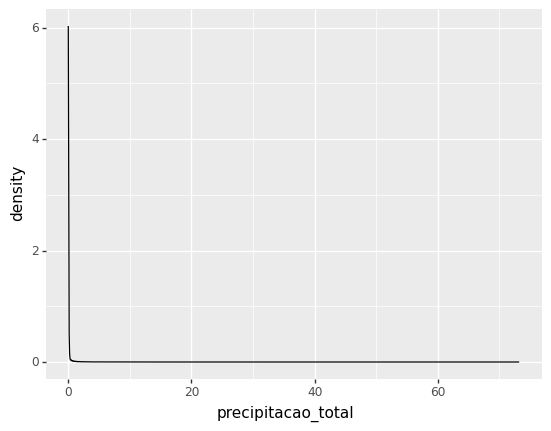

<ggplot: (156233924840)>

In [74]:
(
 pd.read_csv("temp.csv", index_col= 0)
 .pipe(lambda _: ggplot(_)+geom_density(aes("precipitacao_total")))
)

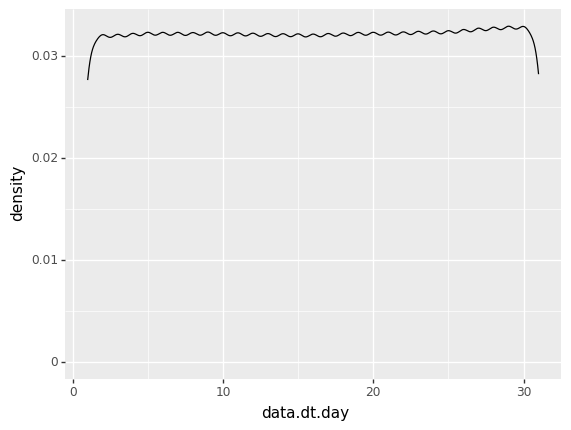

<ggplot: (156236759399)>

In [82]:
(
 pd.read_csv("temp.csv", index_col= 0)
 .assign(data= lambda _: pd.to_datetime(_.data))
 .pipe(lambda _: ggplot(_)+geom_density(aes("data.dt.day")))
)